An undirected graph of n nodes is defined by edgeList, where edgeList[i] = [ui, vi, disi] denotes an edge between nodes ui and vi with distance disi. Note that there may be multiple edges between two nodes.

Given an array queries, where queries[j] = [pj, qj, limitj], your task is to determine for each queries[j] whether there is a path between pj and qj such that each edge on the path has a distance strictly less than limitj .

Return a boolean array answer, where answer.length == queries.length and the jth value of answer is true if there is a path for queries[j] is true, and false otherwise.

 

Example 1:

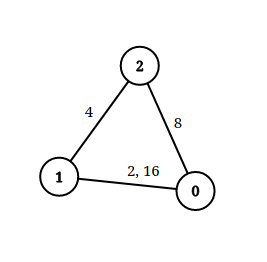

Input: n = 3, edgeList = [[0,1,2],[1,2,4],[2,0,8],[1,0,16]], queries = [[0,1,2],[0,2,5]]
Output: [false,true]
Explanation: The above figure shows the given graph. Note that there are two overlapping edges between 0 and 1 with distances 2 and 16.
For the first query, between 0 and 1 there is no path where each distance is less than 2, thus we return false for this query.
For the second query, there is a path (0 -> 1 -> 2) of two edges with distances less than 5, thus we return true for this query.

Example 2:

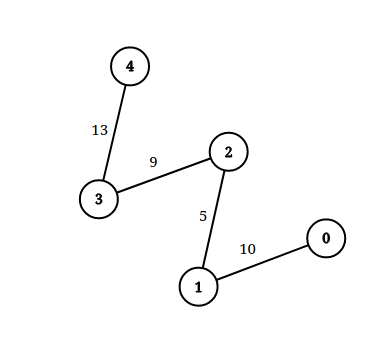

Input: n = 5, edgeList = [[0,1,10],[1,2,5],[2,3,9],[3,4,13]], queries = [[0,4,14],[1,4,13]]
Output: [true,false]
Exaplanation: The above figure shows the given graph.

 

Constraints:

    2 <= n <= 105
    1 <= edgeList.length, queries.length <= 105
    edgeList[i].length == 3
    queries[j].length == 3
    0 <= ui, vi, pj, qj <= n - 1
    ui != vi
    pj != qj
    1 <= disi, limitj <= 109
    There may be multiple edges between two nodes.



In [ ]:
class Solution:
    def dfs(self, curr, end, maxdist):
        self.visited[curr] = True
        if curr == end:
            return True
        for nxt, dst in self.graph[curr]:
            if dst < maxdist and not self.visited[nxt]:
                if self.dfs(nxt, end, maxdist):
                    return True
        return False

            
    def distanceLimitedPathsExist(self, n: int, edgeList: List[List[int]], queries: List[List[int]]) -> List[bool]:
        edgeList = sorted(edgeList, key=lambda x: x[2])
        self.graph = defaultdict(list)
        edges = defaultdict(set)
        

        for u, v, d in edgeList:
            if u not in edges[v]:
                self.graph[u].append((v, d))
                self.graph[v].append((u, d))
                edges[u].add(v)
                edges[v].add(u)

        ans = []
        for start, end, dist in queries:
            self.visited = [False for _ in range(n)]
            ans.append(self.dfs(start, end, dist))
        return ans

In [ ]:
class Solution:
    def dfs(self, curr, end, maxdist):
        self.visited[curr] = True
        if curr == end:
            return True
        for nxt, dst in self.graph[curr]:
            if dst < maxdist and not self.visited[nxt]:
                if self.dfs(nxt, end, maxdist):
                    return True
        return False

            
    def distanceLimitedPathsExist(self, n: int, edgeList: List[List[int]], queries: List[List[int]]) -> List[bool]:
        edgeList = sorted(edgeList, key=lambda x: x[-1])
        queries = sorted(enumerate(queries), key=lambda x: x[1][-1])
        self.graph = defaultdict(list)
        ans = [False for _ in queries]

        i = 0
        for qidx, (start, end, dist) in queries:
            while i < len(edgeList) and edgeList[i][-1] < dist:
                u, v, d = edgeList[i]
                self.graph[u].append((v, d))
                self.graph[v].append((u, d))
                i += 1

            self.visited = [False for _ in range(n)]
            ans[qidx] = self.dfs(start, end, dist)
        return ans

In [2]:
from typing import List

class UF:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0 for _ in self.parent]

    def find(self, x):
        if self.parent[x] == x:
            return x
        self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        xroot, yroot = self.find(x), self.find(y)
        if xroot != yroot:
            if self.rank[xroot] < self.rank[yroot]:
                self.parent[xroot] = yroot
                self.rank[xroot] += 1
            else:
                self.parent[yroot] = xroot
                self.rank[yroot] += 1

class Solution:
    def distanceLimitedPathsExist(self, n: int, edgeList: List[List[int]], queries: List[List[int]]) -> List[bool]:
        edgeList = sorted(edgeList, key=lambda x: x[-1])
        queries = sorted(enumerate(queries), key=lambda x: x[1][-1])
        uf = UF(n)
        ans = [False for _ in queries]

        i = 0
        for qidx, (start, end, dist) in queries:
            while i < len(edgeList) and edgeList[i][-1] < dist:
                u, v, d = edgeList[i]
                uf.union(u, v)
                i += 1

            ans[qidx] = uf.find(start) == uf.find(end)
        return ans